In [1]:
# imports
import re
import ast
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from googlesearch import search
#from google import google as g
from textblob import TextBlob
import texttable as tt
from time import sleep

In [3]:
filepath = 'C:/Users/asheshchoudhury/Desktop/Capstone/allArticles.txt'

C:\Users\asheshchoudhury\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


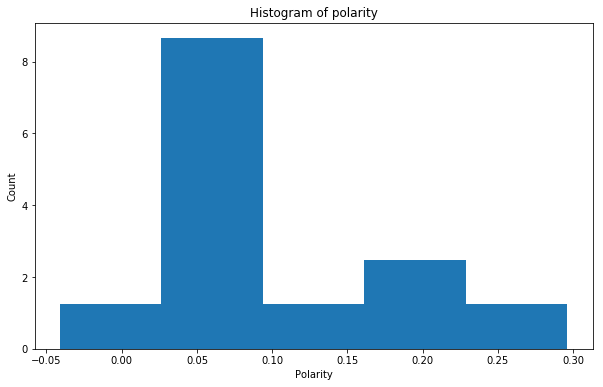

In [4]:
# Plot histogram of Polarity 
tb_sentiment_polarity_list = []
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        #print(tb.sentiment)
        tb_sentiment_polarity_list.append(tb.sentiment.polarity)
        if cnt > 10:
            break
    plt.figure(figsize=(10,6))
    plt.hist(tb_sentiment_polarity_list,normed=True, bins=5)
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.title('Histogram of polarity')
    plt.show();

In [5]:
# Read the file(partially) and print some sentences with positive polarity and some with negative polarity 
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        #print(tb.sentiment)
        #print(len(tb.sentences))
        for item in tb.sentences:
            # 0.7 is a random high number
            if item.sentiment.polarity > 0.7:
                print("Sentences with very +ve polarity:")
                print (item.replace('\n', ' '))
            if item.sentiment.polarity < -0.7:
                print("Sentences with very -ve polarity:")
                print (item.replace('\n', ' '))
        if cnt > 10:
            break

Sentences with very -ve polarity:
When it rains, one is just miserable and huddles in some doorway.
Sentences with very +ve polarity:
Antonio Ruberti, the white-haired educator-statesman who has been Magnificent Rector of Rome State, a position equivalent to president, since 1976, warns that the university is threatened by licealizzazione.
Sentences with very +ve polarity:
Her claim might seem a pleasant bit of hyperbole.
Sentences with very +ve polarity:
And a successful experiment to breed dogs to guard livestock has populated Hampshire's lawns with stray dogs that nuzzle students wherever they rest.
Sentences with very +ve polarity:
Advertising; National Enquirer: 'America at Its Best!'
Sentences with very -ve polarity:
''Were they saying she's retarded?
Sentences with very +ve polarity:
John M. Wilson was best man for his brother.


C:\Users\asheshchoudhury\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


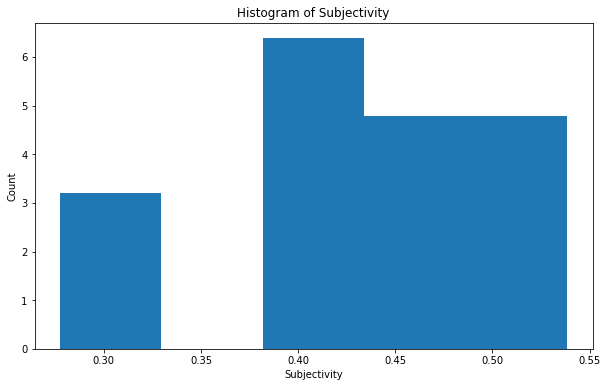

In [6]:
# Plot histogram of subjectivity
tb_sentiment_subjectivity_list = []
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        #print(tb.sentiment)
        tb_sentiment_subjectivity_list.append(tb.sentiment.subjectivity)
        if cnt > 10:
            break
    plt.figure(figsize=(10,6))
    plt.hist(tb_sentiment_subjectivity_list,normed=True, bins=5)
    plt.xlabel('Subjectivity')
    plt.ylabel('Count')
    plt.title('Histogram of Subjectivity')
    plt.show();

In [11]:
# Read the file(partially) and print some sentences with positive Subjectivity and some with negative Subjectivity 
with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        #print(tb.sentiment)
        #print(len(tb.sentences))
        #for item in tb.sentences:
            # 0.7 is a random high number
            #if item.sentiment.subjectivity > 0.67:
                #print("Sentences with very +ve Subjectivity:")
                #print (item.replace('\n', ' '))
            #if 0.33 < item.sentiment.subjectivity < 0.67:
                #print("Sentences with Medium Subjectivity:")
                #print (item.replace('\n', ' '))
            #if item.sentiment.subjectivity < 0.33:
                #print("Sentences with very low Subjectivity:")
                #print (item.replace('\n', ' '))
        if cnt > 10:
            break

In [8]:
# Find polarity % for Trump
total_positive_count,total_neutral_count,total_negative_count = 0,0,0
count_p_total,count_n_total,count_neg_total = 0,0,0

with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        for item in tb.sentences:
            if item.sentiment.polarity > 0.5:
                count_p_total = count_p_total + 1 
                count_p = tb.words.count('trump',case_sensitive=False)
                total_positive_count = total_positive_count + count_p
            if 0.0 < item.sentiment.polarity < 0.5:
                count_n_total = count_n_total + 1 
                count_n = tb.words.count('trump',case_sensitive=False)
                total_neutral_count = total_neutral_count + count_n
            if item.sentiment.polarity < 0.0:
                count_neg_total = count_neg_total + 1 
                count_neg = tb.words.count('trump',case_sensitive=False)
                total_negative_count = total_negative_count + count_neg
        if cnt > 10000:
            break
print("Statement about Trump with >0.5 polarity :",  total_positive_count)
print("Statement with >0.5 polarity :",  count_p_total)
print("Statement % for Trump with >0.5 polarity :",  round(100*total_positive_count/count_p_total,1))
print("Statement about Trump between 0 and 0.5 polarity :" ,total_neutral_count)
print("Statement between 0 and 0.5 polarity :" ,count_n_total)
print("Statement % for Trump between 0 and 0.5 polarity :",  round(100*total_neutral_count/count_n_total,1))
print("Statement about Trump with <0.0 polarity :" ,total_negative_count)
print("Statement with <0.0 polarity :" ,count_neg_total)
print("Statement % for Trump with <0.0 polarity :",  round(100*total_negative_count/count_neg_total,1))

Statement about Trump with >0.5 polarity : 136
Statement with >0.5 polarity : 6214
Statement % for Trump with >0.5 polarity : 2.2
Statement about Trump between 0 and 0.5 polarity : 1732
Statement between 0 and 0.5 polarity : 86528
Statement % for Trump between 0 and 0.5 polarity : 2.0
Statement about Trump with <0.0 polarity : 730
Statement with <0.0 polarity : 45895
Statement % for Trump with <0.0 polarity : 1.6


In [9]:
# Find Subjectivity % for Trump
total_positive_count,total_neutral_count,total_negative_count = 0,0,0
count_p_total,count_n_total,count_neg_total = 0,0,0

with open(filepath) as fp:
    for cnt, line in enumerate(fp):
        tb = TextBlob(line)
        for item in tb.sentences:
            if item.sentiment.subjectivity > 0.67:
                count_p_total = count_p_total + 1 
                count_p = tb.words.count('trump',case_sensitive=False)
                total_positive_count = total_positive_count + count_p
            if 0.33 < item.sentiment.subjectivity < 0.67:
                count_n_total = count_n_total + 1 
                count_n = tb.words.count('trump',case_sensitive=False)
                total_neutral_count = total_neutral_count + count_n
            if item.sentiment.subjectivity < 0.33:
                count_neg_total = count_neg_total + 1 
                count_neg = tb.words.count('trump',case_sensitive=False)
                total_negative_count = total_negative_count + count_neg
        if cnt > 10000:
            break
print("Statement about Trump with >0.67 subjectivity :",  total_positive_count)
print("Statement with >0.67 subjectivity :",  count_p_total)
print("Statement % for Trump with >0.67 subjectivity :",  round(100*total_positive_count/count_p_total,1))
print("Statement about Trump between 0.33 and 0.67 subjectivity :" ,total_neutral_count)
print("Statement between 0.33 and 0.67 subjectivity :" ,count_n_total)
print("Statement % for Trump between 0.33 and 0.67 subjectivity :",  round(100*total_neutral_count/count_n_total,1))
print("Statement about Trump with <0.33 subjectivity :" ,total_negative_count)
print("Statement with <0.33 subjectivity :" ,count_neg_total)
print("Statement % for Trump with <0.33 subjectivity :",  round(100*total_negative_count/count_neg_total,1))

Statement about Trump with >0.67 subjectivity : 484
Statement with >0.67 subjectivity : 24088
Statement % for Trump with >0.67 subjectivity : 2.0
Statement about Trump between 0.33 and 0.67 subjectivity : 1706
Statement between 0.33 and 0.67 subjectivity : 87302
Statement % for Trump between 0.33 and 0.67 subjectivity : 2.0
Statement about Trump with <0.33 subjectivity : 2269
Statement with <0.33 subjectivity : 131783
Statement % for Trump with <0.33 subjectivity : 1.7
